<a href="https://colab.research.google.com/github/bhuvighosh3/Content-monetisation-revenue-prediction-on-YouTube-data/blob/main/Content_monetisation_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic: Content monetisation & Revenue prediction on YouTube data.

> 
YouTube is a highly popular platform for creators of video content, with more than 2 billion monthly active users. As a result, it has become a popular destination for content creators to showcase their abilities and reach a larger audience. Nonetheless, with such an immense amount of content available, it can be difficult to get noticed and obtain the necessary views and subscribers to monetise the content that they are posting. To overcome these challenges, YouTubers must optimize their videos to obtain the maximum amount of engagement, views, and subscribers. The dataset provided below takes into consideration various features that play a pivotal role in determining the revenue of Youtubers.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns

In [ ]:
sns.set_style('darkgrid')

In [ ]:
df1=pd.read_csv('/content/Table data 2018.csv')

In [ ]:
df2=pd.read_csv('/content/Table data 2019.csv')

In [ ]:
df3=pd.read_csv('/content/Table data 2020.csv')

In [ ]:
df1=df1[1:]

In [ ]:
df1.columns

Index(['Date', 'Av­er­age views per view­er', 'Unique view­ers',
       'Im­pres­sions click-through rate (%)', 'Im­pres­sions',
       'Com­ments ad­ded', 'Shares', 'Likes (vs. dis­likes) (%)', 'Dis­likes',
       'Sub­scribers lost', 'Sub­scribers gained', 'Likes',
       'Av­er­age per­cent­age viewed (%)', 'Videos pub­lished',
       'Videos ad­ded', 'Sub­scribers', 'Views', 'Watch time (hours)',
       'Av­er­age view dur­a­tion', 'Your es­tim­ated rev­en­ue (USD)'],
      dtype='object')

In [ ]:
df2=df2[1:]

In [ ]:
df3=df3[1:]

In [ ]:
df=pd.concat([df1,df2,df3],axis=0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1135 entries, 1 to 501
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  1135 non-null   object 
 1   Av­er­age views per view­er           1133 non-null   float64
 2   Unique view­ers                       1133 non-null   float64
 3   Im­pres­sions click-through rate (%)  1133 non-null   float64
 4   Im­pres­sions                         1133 non-null   float64
 5   Com­ments ad­ded                      1133 non-null   float64
 6   Shares                                1133 non-null   float64
 7   Likes (vs. dis­likes) (%)             1096 non-null   float64
 8   Dis­likes                             1133 non-null   float64
 9   Sub­scribers lost                     1133 non-null   float64
 10  Sub­scribers gained                   1133 non-null   float64
 11  Likes             

In [ ]:
df.columns

Index(['Date', 'Av­er­age views per view­er', 'Unique view­ers',
       'Im­pres­sions click-through rate (%)', 'Im­pres­sions',
       'Com­ments ad­ded', 'Shares', 'Likes (vs. dis­likes) (%)', 'Dis­likes',
       'Sub­scribers lost', 'Sub­scribers gained', 'Likes',
       'Av­er­age per­cent­age viewed (%)', 'Videos pub­lished',
       'Videos ad­ded', 'Sub­scribers', 'Views', 'Watch time (hours)',
       'Av­er­age view dur­a­tion', 'Your es­tim­ated rev­en­ue (USD)'],
      dtype='object')

In [ ]:
columns=df.select_dtypes(include=['int','float']).columns
columns=columns.tolist()

## Dropping duplicate values:

In [ ]:
df.drop_duplicates(inplace=True)

## Checking is null values exist & dropping them in case they are in a minor percentage:

In [ ]:
df.isnull().sum()/len(df)

Date                                    0.000000
Av­er­age views per view­er             0.000882
Unique view­ers                         0.000882
Im­pres­sions click-through rate (%)    0.000882
Im­pres­sions                           0.000882
Com­ments ad­ded                        0.000882
Shares                                  0.000882
Likes (vs. dis­likes) (%)               0.033510
Dis­likes                               0.000882
Sub­scribers lost                       0.000882
Sub­scribers gained                     0.000882
Likes                                   0.000882
Av­er­age per­cent­age viewed (%)       0.000882
Videos pub­lished                       0.126102
Videos ad­ded                           0.126102
Sub­scribers                            0.000882
Views                                   0.000882
Watch time (hours)                      0.000882
Av­er­age view dur­a­tion               0.000882
Your es­tim­ated rev­en­ue (USD)        0.000882
dtype: float64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 988 entries, 1 to 500
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  988 non-null    object 
 1   Av­er­age views per view­er           988 non-null    float64
 2   Unique view­ers                       988 non-null    float64
 3   Im­pres­sions click-through rate (%)  988 non-null    float64
 4   Im­pres­sions                         988 non-null    float64
 5   Com­ments ad­ded                      988 non-null    float64
 6   Shares                                988 non-null    float64
 7   Likes (vs. dis­likes) (%)             988 non-null    float64
 8   Dis­likes                             988 non-null    float64
 9   Sub­scribers lost                     988 non-null    float64
 10  Sub­scribers gained                   988 non-null    float64
 11  Likes              

In [ ]:
df.head()

,Date,Av­er­age views per view­er,Unique view­ers,Im­pres­sions click-through rate (%),Im­pres­sions,Com­ments ad­ded,Shares,Likes (vs. dis­likes) (%),Dis­likes,Sub­scribers lost,Sub­scribers gained,Likes,Av­er­age per­cent­age viewed (%),Videos pub­lished,Videos ad­ded,Sub­scribers,Views,Watch time (hours),Av­er­age view dur­a­tion,Your es­tim­ated rev­en­ue (USD)
1,2018-08-21,1.1538,13.0,7.38,122.0,2.0,1.0,100.0,0.0,0.0,5.0,5.0,53.59,1.0,1.0,5.0,15.0,0.4666,0:01:51,0.0
13,2018-09-02,1.1681,119.0,13.24,846.0,0.0,2.0,100.0,0.0,0.0,1.0,9.0,43.36,1.0,1.0,1.0,139.0,3.8101,0:01:38,0.0
18,2018-09-07,1.5297,202.0,10.92,2171.0,4.0,2.0,100.0,0.0,2.0,14.0,16.0,43.47,1.0,2.0,12.0,309.0,10.6117,0:02:03,0.0
19,2018-09-08,1.5778,225.0,10.37,2489.0,3.0,2.0,100.0,0.0,1.0,8.0,24.0,35.78,1.0,1.0,7.0,355.0,9.0243,0:01:31,0.0
84,2018-11-12,1.0968,31.0,10.66,272.0,3.0,1.0,100.0,0.0,0.0,0.0,1.0,30.21,0.0,4.0,0.0,34.0,1.4151,0:02:29,0.0


## Function to remove outliers:

In [ ]:
def remove_outliers(df, col_list, z_thresh=4.3):
    for col in col_list:
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        df = df[z_scores < z_thresh]
    return df
df=remove_outliers(df,columns,4.3)

In [ ]:
len(df)

888

## Converting date column from object to Datetime type:

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['year'] = df['Date'].dt.year

In [ ]:
df['year'].unique()

array([2018, 2019, 2020, 2021])

In [ ]:
df.head()

,Date,Av­er­age views per view­er,Unique view­ers,Im­pres­sions click-through rate (%),Im­pres­sions,Com­ments ad­ded,Shares,Likes (vs. dis­likes) (%),Dis­likes,Sub­scribers lost,...,Videos pub­lished,Videos ad­ded,Sub­scribers,Views,Watch time (hours),Av­er­age view dur­a­tion,Your es­tim­ated rev­en­ue (USD),month,day,year
18,2018-09-07,1.5297,202.0,10.92,2171.0,4.0,2.0,100.00,0.0,2.0,...,1.0,2.0,12.0,309.0,10.6117,0:02:03,0.0,9,7,2018
19,2018-09-08,1.5778,225.0,10.37,2489.0,3.0,2.0,100.00,0.0,1.0,...,1.0,1.0,7.0,355.0,9.0243,0:01:31,0.0,9,8,2018
125,2018-12-23,1.4860,107.0,9.94,1247.0,8.0,0.0,100.00,0.0,1.0,...,1.0,1.0,1.0,159.0,5.7303,0:02:09,0.0,12,23,2018
1,2019-01-01,1.4639,263.0,10.18,2534.0,8.0,0.0,100.00,0.0,0.0,...,1.0,1.0,6.0,385.0,12.6678,0:01:58,0.0,1,1,2019
20,2019-01-20,1.5021,12941.0,10.68,138946.0,67.0,31.0,95.93,22.0,22.0,...,1.0,1.0,227.0,19439.0,717.4992,0:02:12,0.0,1,20,2019


## Checking the distribution of the output variable:

<ipython-input-24-882e144b6cd5>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['year']==2019]['Your es­tim­ated rev­en­ue (USD)'], color='red', ax=axes[0])
<ipython-input-24-882e144b6cd5>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['year']==2020]['Your es­tim­ated rev­en­ue (

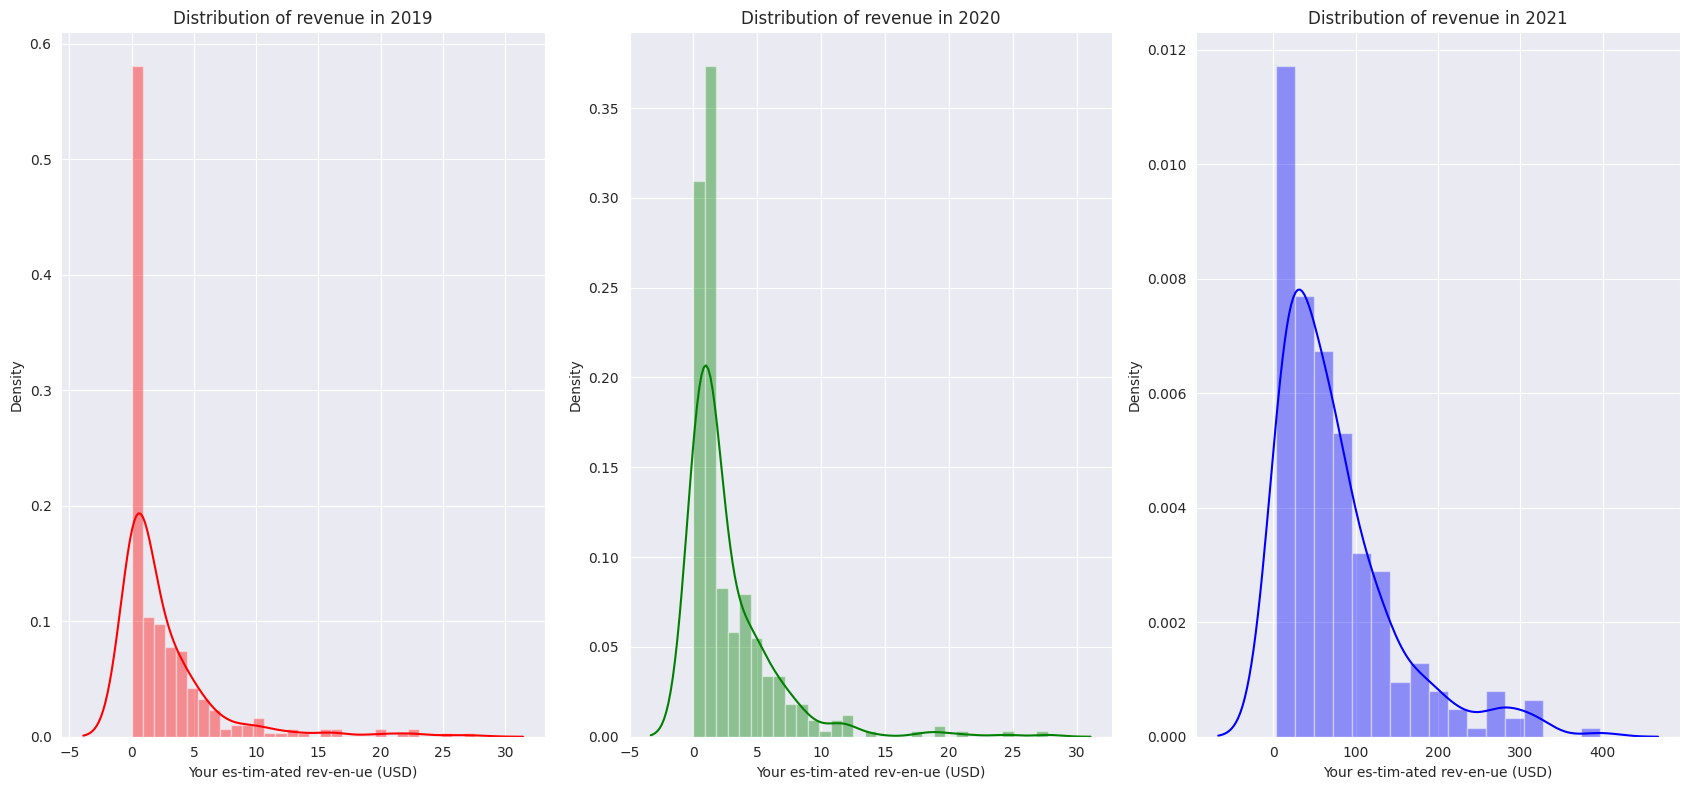

In [ ]:
# set the style to darkgrid
sns.set_style('darkgrid')

# create a grid of subplots with 1 row and 3 columns
fig, axes = plt.subplots(ncols=3, figsize=(17,8))

# plot the distribution of revenue in 2019 on the first subplot
sns.distplot(df[df['year']==2019]['Your es­tim­ated rev­en­ue (USD)'], color='red', ax=axes[0])
axes[0].set_title('Distribution of revenue in 2019')

# plot the distribution of revenue in 2020 on the second subplot
sns.distplot(df[df['year']==2020]['Your es­tim­ated rev­en­ue (USD)'], color='green', ax=axes[1])
axes[1].set_title('Distribution of revenue in 2020')

# plot the distribution of revenue in 2021 on the third subplot
sns.distplot(df[df['year']==2021]['Your es­tim­ated rev­en­ue (USD)'], color='blue', ax=axes[2])
axes[2].set_title('Distribution of revenue in 2021')

# adjust the spacing between subplots
plt.tight_layout()

# display the plot
plt.show()

## It is right skewed for the three given years.

## Finding correlation between the variables:

<ipython-input-25-f69d2fffa6ef>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="rocket_r", annot=True, linewidths=0.5, fmt=".2f", ax=ax)


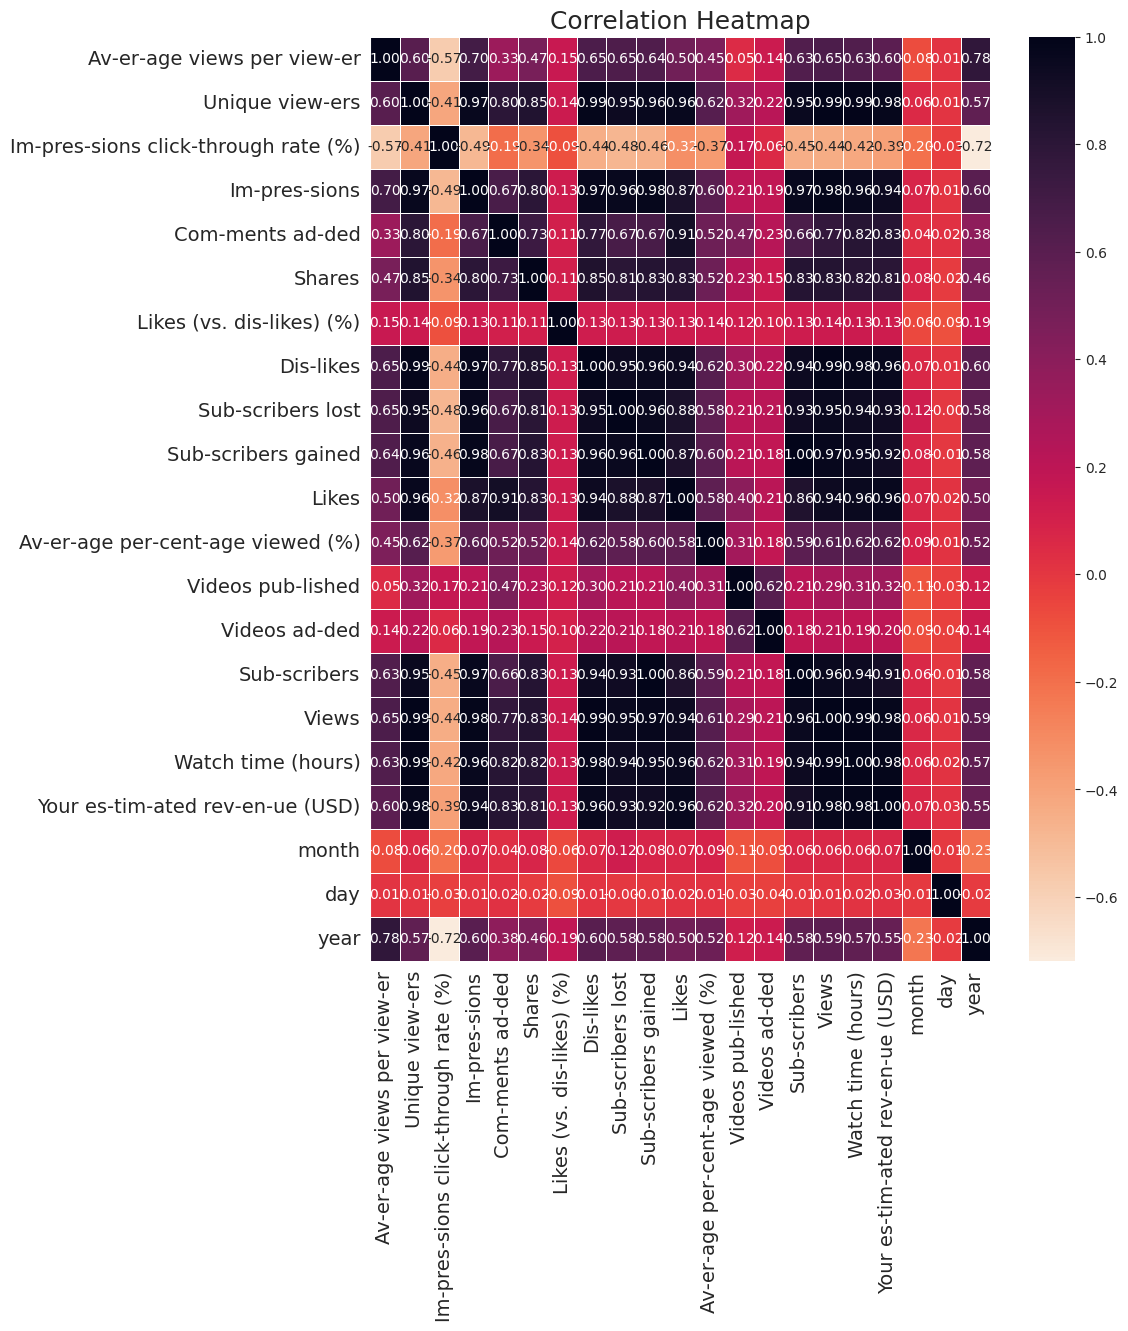

In [ ]:
fig, ax = plt.subplots(figsize=(10,12))
sns.heatmap(df.corr(), cmap="rocket_r", annot=True, linewidths=0.5, fmt=".2f", ax=ax)
ax.set_title("Correlation Heatmap", fontsize=18)
ax.tick_params(labelsize=14)
sns.despine(ax=ax, top=True, bottom=True)
plt.show()

In [ ]:
corr_matrix = df.corr()
corr_values = corr_matrix['Your es­tim­ated rev­en­ue (USD)'].drop('Your es­tim­ated rev­en­ue (USD)')

<ipython-input-26-57ea96d97aac>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


## Finding the correlation between the target attribute & the other attributes:

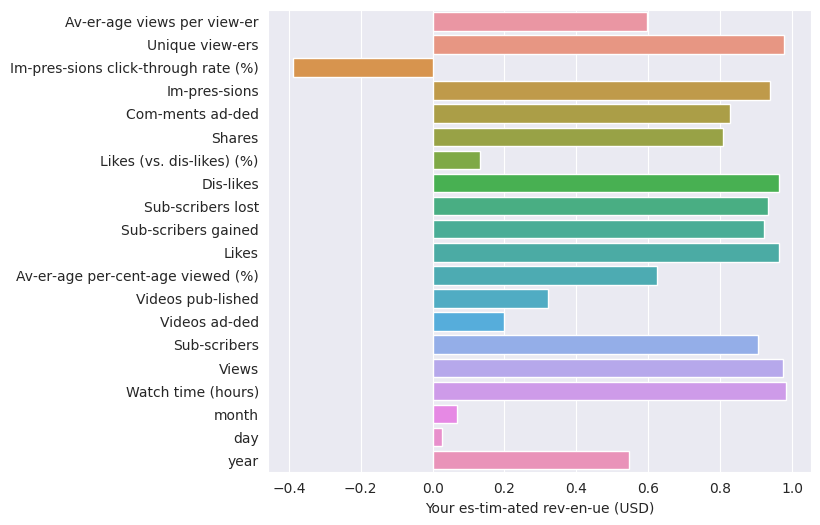

In [ ]:
plt.figure(figsize=(7,6))
sns.barplot(y=corr_values.index,x=corr_values)
plt.show()

## Determining the most important features:

In [ ]:
def get_correlated_attributes(df, target_var, threshold):
    # get the correlation matrix
    corr_matrix = df.corr()
    # get the correlation values for the target variable
    corr_values = corr_matrix[target_var].drop(target_var)
    # filter the attributes by the correlation threshold
    correlated_attrs = corr_values[corr_values >= threshold].index
    # return the list of correlated attributes
    return correlated_attrs

In [ ]:
z_pos=get_correlated_attributes(df,'Your es­tim­ated rev­en­ue (USD)',0.6)

<ipython-input-28-054fbbdc8730>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


In [ ]:
print(z_pos)

Index(['Unique view­ers', 'Im­pres­sions', 'Com­ments ad­ded', 'Shares',
       'Dis­likes', 'Sub­scribers lost', 'Sub­scribers gained', 'Likes',
       'Av­er­age per­cent­age viewed (%)', 'Sub­scribers', 'Views',
       'Watch time (hours)'],
      dtype='object')


In [ ]:
def get_correlated_attributes(df, target_var, threshold):
    # get the correlation matrix
    corr_matrix = df.corr()
    # get the correlation values for the target variable
    corr_values = corr_matrix[target_var].drop(target_var)
    # filter the attributes by the correlation threshold
    correlated_attrs = corr_values[corr_values <= threshold].index
    # return the list of correlated attributes
    return correlated_attrs

In [ ]:
z_neg=get_correlated_attributes(df,'Your es­tim­ated rev­en­ue (USD)',-0.6)

<ipython-input-31-659e8b10d090>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


In [ ]:
z_neg

Index([], dtype='object')

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = go.Figure(data=go.Scatter(x=df['Shares'], y=df['Your es­tim­ated rev­en­ue (USD)'], mode='markers'))

## Is the target variable linearly dependent on the most important features? Let's check out how these features affect the target variable.

In [ ]:
def plot_in_grid(z, df):
    fig = make_subplots(rows=4, cols=3, subplot_titles=z + ' versus Estimated revenue')

    for i, col in enumerate(z):
        trace = go.Scatter(x=df[col], y=df['Your es­tim­ated rev­en­ue (USD)'], mode='markers')
        row = (i // 3) + 1
        col = (i % 3) + 1
        fig.add_trace(trace, row=row, col=col)
        fig.update_xaxes(title_text=col, row=row, col=col)
        fig.update_yaxes(title_text='Estimated Revenue (USD)', row=row, col=col)

    fig.update_layout(
        height=1200,
        font=dict(
            family='Arial',
            size=18,
            color='#7f7f7f'
        ),
        margin=dict(
            l=50,
            r=50,
            b=50,
            t=80,
            pad=0
        )
    )

    fig.show()
plot_in_grid(z_pos,df)

### The revenue linearly increases with an increase in unique viewers, subscribers, subscribers gained, likes,dislikees, views, shares & impressions. However there is a non-linear change in the estimated revenue with respected to the percentage viewed going upto 400 illion dollars.

## Average revenue per year:

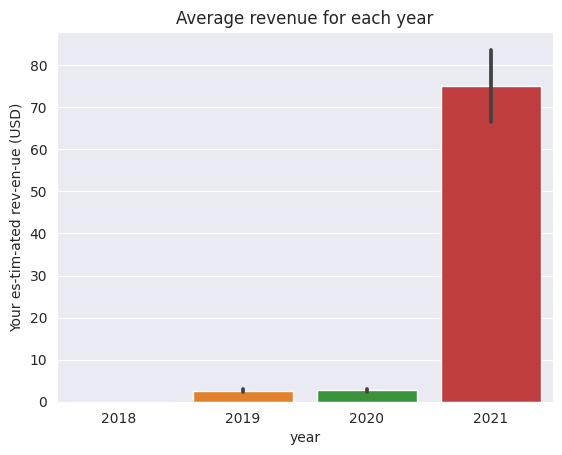

In [ ]:
sns.barplot(x='year',y='Your es­tim­ated rev­en­ue (USD)',data=df)
plt.title('Average revenue for each year')
plt.show()

In [ ]:
df1=df[df['year']==2021]
df2=df[df['year']==2020]
df3=df[df['year']==2018]
df4=df[df['year']==2019]

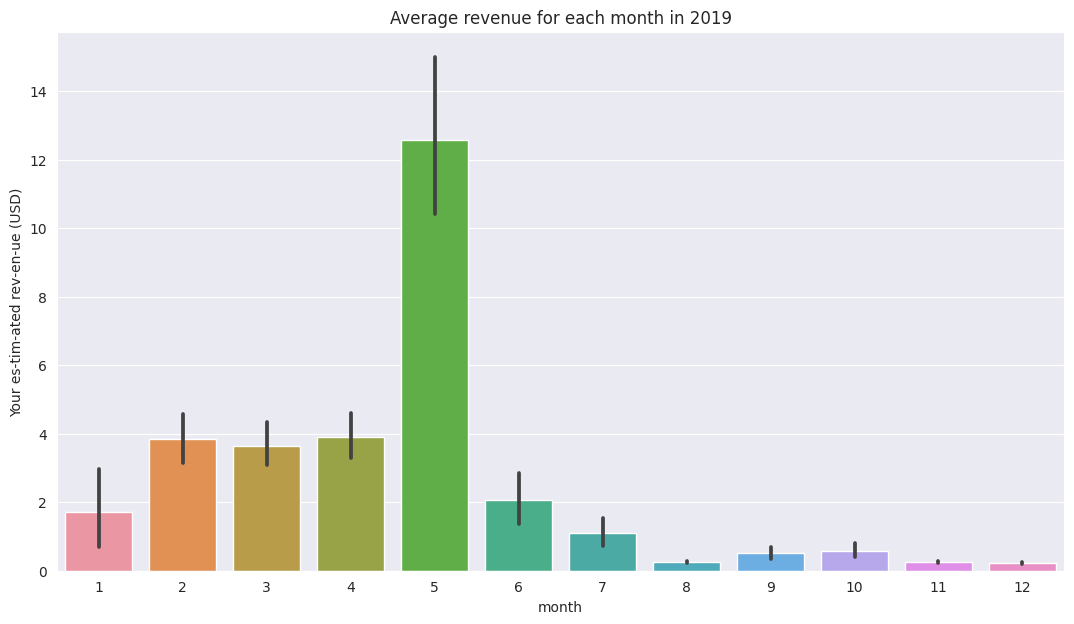

In [ ]:
plt.figure(figsize=(13,7))
sns.barplot(x='month',y='Your es­tim­ated rev­en­ue (USD)',data=df4)
plt.title('Average revenue for each month in 2019')
plt.show()

May had the maximum revenue earning during the year 2019 & December saw the least amount of earning.

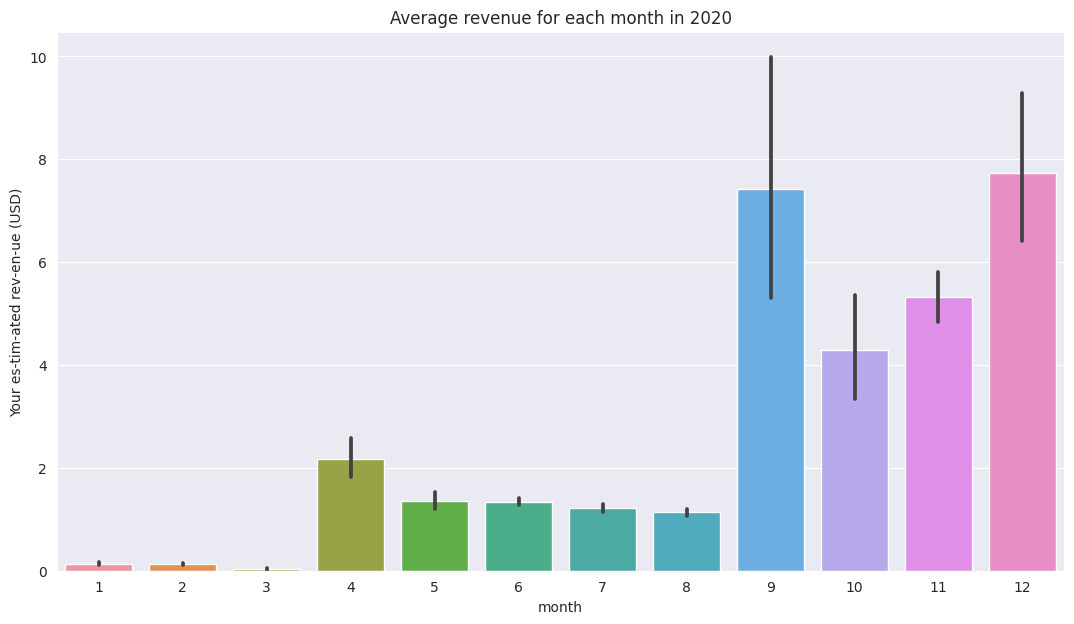

In [ ]:
plt.figure(figsize=(13,7))
sns.barplot(x='month',y='Your es­tim­ated rev­en­ue (USD)',data=df2)
plt.title('Average revenue for each month in 2020')
plt.show()

December had the maximum revenue earning during the year 2020 & March saw the least amount of earning.

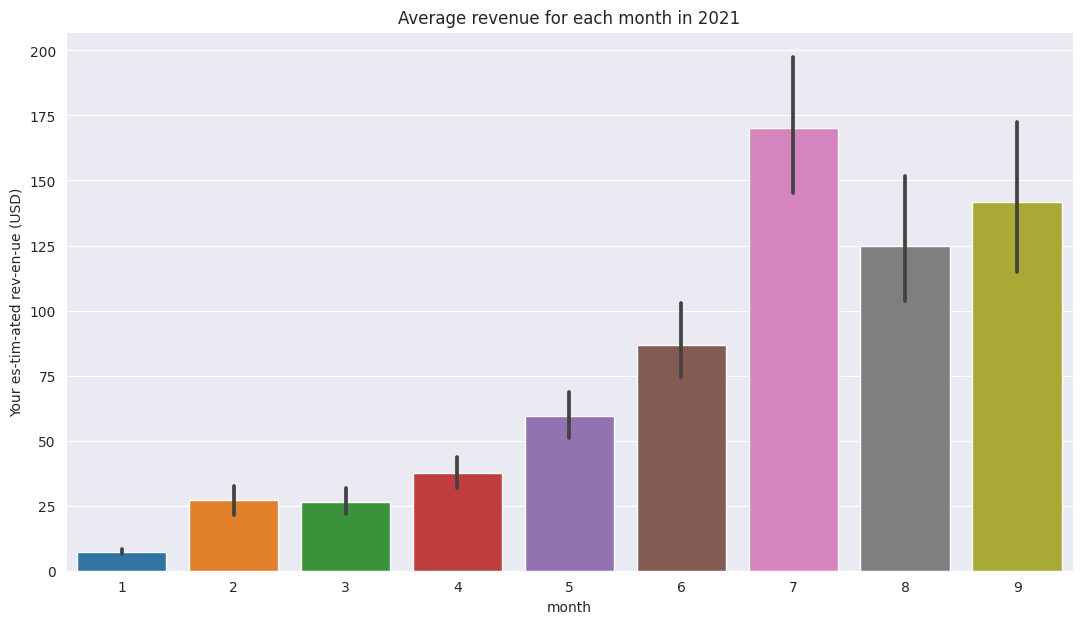

In [ ]:
plt.figure(figsize=(13,7))
sns.barplot(x='month',y='Your es­tim­ated rev­en­ue (USD)',data=df1)
plt.title('Average revenue for each month in 2021')
plt.show()

July had the maximum revenue earning during the year 2021 & January saw the least amount of earning.

## Monthly comparison of average revenue of the years:

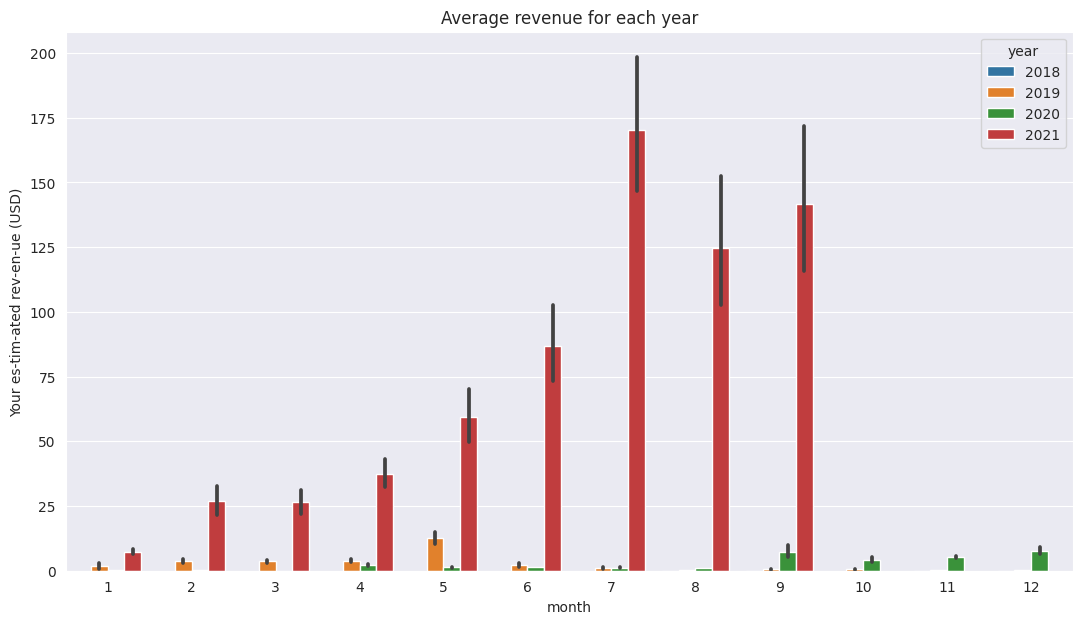

In [ ]:
plt.figure(figsize=(13,7))
sns.barplot(x='month',y='Your es­tim­ated rev­en­ue (USD)',hue='year',data=df)
plt.title('Average revenue for each year')
plt.show()

## Revenue trends over the years:

In [ ]:
def plot_in_grid(df1, df2, df3, df4):
    fig = make_subplots(rows=2, cols=2,
                        subplot_titles=('2018','2019','2020','2021'))

    fig.add_trace(go.Scatter(x=df3['Date'], y=df3['Your es­tim­ated rev­en­ue (USD)'],
                             mode='lines', name='2018'), row=1, col=1)

    fig.add_trace(go.Scatter(x=df4['Date'], y=df4['Your es­tim­ated rev­en­ue (USD)'],
                             mode='lines', name='2019'), row=1, col=2)

    fig.add_trace(go.Scatter(x=df2['Date'], y=df2['Your es­tim­ated rev­en­ue (USD)'],
                             mode='lines', name='2020'), row=2, col=1)

    fig.add_trace(go.Scatter(x=df1['Date'], y=df1['Your es­tim­ated rev­en­ue (USD)'],
                             mode='lines', name='2021'), row=2, col=2)

    fig.update_xaxes(title_text='Date', row=1, col=1)
    fig.update_xaxes(title_text='Date', row=1, col=2)
    fig.update_xaxes(title_text='Date', row=2, col=1)
    fig.update_xaxes(title_text='Date', row=2, col=2)

    fig.update_yaxes(title_text='Estimated Revenue (USD)', row=1, col=1)
    fig.update_yaxes(title_text='Estimated Revenue (USD)', row=1, col=2)
    fig.update_yaxes(title_text='Estimated Revenue (USD)', row=2, col=1)
    fig.update_yaxes(title_text='Estimated Revenue (USD)', row=2, col=2)

    fig.update_layout(height=800, width=1200, showlegend=True)

    fig.show()
plot_in_grid(df1,df2,df3,df4)

### The above plots show the trend of revenue over the years. There is a spike in the mid 2019.In 2020, the revenue saw a considerable increase from September to December. In 2021 there is a constant increase in revenue with time.

In [ ]:
px.line(df, x='Date', y='Your es­tim­ated rev­en­ue (USD)',title='Trend of revenue over the years',color='year')

## Revenue distribution over the years:

In [ ]:
fig = go.Figure(data=[go.Pie(labels=df['year'], values=df['Your es­tim­ated rev­en­ue (USD)'],title='Revenue Distribution')])
fig.show()

###Maximum revenue generation has occured in 2021 & it contributes to 91.5% of the total revenue generated.

## Distribution of revenue over the months:

In [ ]:
fig = go.Figure(data=[go.Pie(labels=df['month'], values=df['Your es­tim­ated rev­en­ue (USD)'],title='Revenue Distribution over the months')])
fig.show()

### From the pie chart, it can be inferred that maximum amount of revenue has been generated in July & September over the years.November & December have the least revenue generation.

## Removing outliers & splitting the data into training & testing sets.

## Removing the entries where the year is 2018 since the revenue in 2018 is negigible

In [ ]:
df=df[df['year']!=2018]

In [ ]:
len(df)

885

## Converting average view duration from object datatype to seconds:

In [ ]:
df['Av­er­age view dur­a­tion']=pd.to_timedelta(df['Av­er­age view dur­a­tion']).dt.total_seconds()

## Splitting the data into training & testing with respect to a particular date:

> Since it is a time series data, performing a random split would not be the appropriate choice in this case.



In [ ]:
x_train=df[df['Date']<'01-10-2021'].drop(columns=['Date','Your es­tim­ated rev­en­ue (USD)'],axis=1).reset_index(drop=True)
y_train=df[df['Date']<'01-10-2021'].drop(columns='Date',axis=1)['Your es­tim­ated rev­en­ue (USD)'].reset_index(drop=True)
x_test=df[df['Date']>='01-10-2021'].drop(columns=['Date','Your es­tim­ated rev­en­ue (USD)'],axis=1).reset_index(drop=True)
y_test=df[df['Date']>='01-10-2021'].drop(columns='Date',axis=1)['Your es­tim­ated rev­en­ue (USD)'].reset_index(drop=True)

## Scaling the data using Standard Scaler:

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
scaler.fit(x_test)

StandardScaler()

##1) Training the model using Random Forest & applying Grid Search CV for hyperparameter tuning:

> 1)Random forest is used over any other linear model since all the features were not linearly dependent on the target variable. Hence, using a linear model would not have been a suitable choice in this case.


> 2) Since the data is imbalanced using Random Forest is preferred over any other technique.



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Define the model
rf_model = RandomForestRegressor(random_state=50)

# Define the hyperparameter grid
param_grid = {
    'n_estimators':np.arange(100,330,15),
    'max_depth':np.arange(3,10,1),
    'max_features': ['sqrt', 'log2']
}
# Define the Grid Search object with R2 score as the scoring method
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

# Fit the Grid Search object to the data
grid_search.fit(x_train,y_train)

# Retrieve the best R2 score and the best hyperparameters
best_hyperparams = grid_search.best_params_

In [ ]:
best_hyperparams

{'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 220}

## Tuning the model on best hyperparameters:

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=220,max_depth=8,max_features='sqrt',random_state=50)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

## R2 Score:

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
r2_score(y_test,y_pred)

-0.593170782858037

### Negative R2 Score signifies that the model does not capture a significant amount of varience. Hence, choosing another model will be an appropriate choice in this case.

## Mean Squared Error:

In [ ]:
mean_squared_error(y_test,y_pred)

1052.8185156341624

## Mean Absolute Error:

In [ ]:
mean_absolute_error(y_test,y_pred)

24.10280285810768

### R2 Score, mean absolute error & mean squared error are the evaluation metrics used to determine the model that best fits the data. It will help in selecting the appropriate regressor for the given dataset.

## 2) XG Boost Regressor: Using Grid Search CV for hyperparameter tuning.

>1)XG Boost Regressor is selected since it combines all weak learners & sequentially learns from the errors made by the weak learners to build a robust model.


>2) XG Boost Regressor performs the task of feature selection on its own which further makes it an appropriate model of choice in the regression problem given in this case.


>3) XG Boost Regressor can handle both linear and non-linear relationships between the input features and the output variable. It uses a combination of decision trees and gradient boosting to capture complex relationships between the input features and the output variable.







In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {
    'learning_rate': [0.1, 0.01],
    'n_estimators':np.arange(100,500,16),
    'max_depth': [3,4,5,6,7,8]
}
xgb=XGBRegressor()
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, verbose=2)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   1.9s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=116; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=116; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=116; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=116; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=116; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=132; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=3, n

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'n_estimators': array([100, 116, 132, 148, 164, 180, 196, 212, 228, 244, 260, 276, 292,
       308, 324, 340, 356, 372, 388, 404, 420, 436, 452, 468, 484])},
             verbose=2)

In [ ]:
best_estimator = grid_search.best_estimator_
test_score = best_estimator.score(x_train, y_train)

In [ ]:
best_estimator

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

## Evaluation parameters:

## R2 Score:

In [ ]:
test_score

0.7570357342885567

### This is a good r2 score & the model captures a significant amount of varience. Hence, it will generalise well even on unseen data to give significant results.

## Mean Absolute Error:

In [ ]:
mean_absolute_error(y_test,y_pred)

34.60735338029757

## Mean Squared Error:

In [ ]:
mean_squared_error(y_test,y_pred)

1840.697109277877

##3) SVM:Using Grid Search CV for hyperparameter tuning.
Reasons for choosing SVM:

> 1)SVMs can effectively handle non-linear data by mapping input features to a high-dimensional space and finding a hyperplane that separates data points with the largest margin.
SVMs can be effective on small to medium-sized datasets, as they are less prone to overfitting and can generalize well to new data points.

>2) SVMs are suitable for regression tasks that require good generalization to new data, as they have good generalization capabilities.

>3)SVMs are relatively robust to outliers in the data, which helps to improve the accuracy and robustness of the model.






In [ ]:
from sklearn.svm import SVR
svr=SVR()
param_grid = {'C': [0.1,0.01,1,10],
              'gamma': [0.1, 1, 10, 100],
              'kernel': ['rbf','linear']}
grid_search = GridSearchCV(svr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)
y_pred = grid_search.best_estimator_.predict(x_test)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [ ]:
grid_search.best_estimator_

SVR(C=0.01, gamma=0.1)

## R2 score:

In [ ]:
svr=SVR('C':0.01,'gamma')
r2_score(y_test,y_pred)

-2.4453407080619285

### Negative R2 Score signifies that the model does not capture a significant amount of varience. Hence, choosing another model will be an appropriate choice in this case.

## Mean Squared Error:

In [ ]:
mean_squared_error(y_test,y_pred)

2276.791998161401

## Mean Absolute Error:

In [ ]:
mean_absolute_error(y_test,y_pred)

33.2934


## Conclusion:

> Comparison of MSE & MAE of all 3 models.



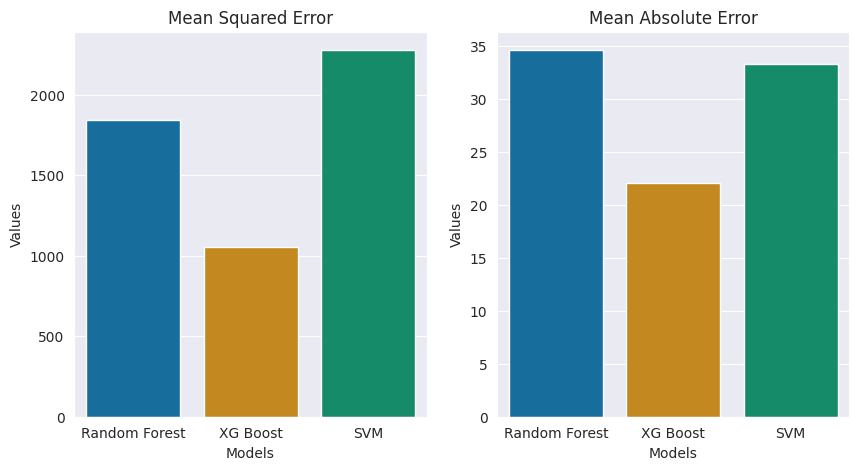

In [ ]:
values1 = [1840, 1052, 2276.7919]
values2 = [34.6073, 22.1028, 33.2934]
labels1 = ["Random Forest", "XG Boost", "SVM"]
labels2 = ["Random Forest", "XG Boost", "SVM"]

sns.set_palette("colorblind")

# Create a grid of two barplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot the first barplot
sns.barplot(x=labels1, y=values1, ax=axes[0])
axes[0].set_title("Mean Squared Error")
axes[0].set_xlabel("Models")
axes[0].set_ylabel("Values")

# Plot the second barplot
sns.barplot(x=labels2, y=values2, ax=axes[1])
axes[1].set_title("Mean Absolute Error")
axes[1].set_xlabel("Models")
axes[1].set_ylabel("Values")

# Show the plot
plt.show()

## The above plot compared the evaluation parameters of all model & clearly indicates that XG Boost Regressor is the appropriate model to be used in this case. Since the mean squared error & mean absolute error of XG Boost Regressor is the least & the r2 score of XG Boost is maximum which indicates that it captures maximum varience & hence generalises unseen data better, it is the best suited model in this case.

## Model chosen: XG Boost Regressor
## R2 score of regressor: 0.7570
## MSE of regressor:1052.8185
## MAE of regressor: 24.1028